Quatum Trajectories Rc mapping

$  H_0= \frac{\omega}{2} \sigma_z + \frac{\Delta}{2} \sigma_x+ \Omega b ^{\dagger} b +g \sigma_z  \left( b + b ^{\dagger} \right) + \frac{g^2}{\Omega} \sigma_z^2 + \Omega \Delta_{RC} \left( b + b ^{\dagger} \right)^2$

$   H_B= \sum_{k} \Omega_k b_k ^{\dagger} b_k $

$   H_I= \left( b + b ^{\dagger} \right) \sum_k h_k \left( b_k + b_k ^{\dagger} \right)$


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA
import scipy.integrate as integrate
from scipy.integrate import quad

We construct the algebra of the $2 \otimes n$ Hilbert space for the supersystem (2 level system and RC)

In [106]:
#### Parameters 


###Qubit parameters
omega=0.5
delta=1.0
## Rc parameters
omega_Rc= 0.1 #10.0
delta_Rc=0 #(2/(375*np.pi))/omega_Rc
g=0.1795755
##Temeperature
beta=0.95

##################### Hilbert space for the Hamitonial 
N_RC = 30 # number of basis states to consider
b = destroy(N_RC)

H0= omega/2 *tensor(sigmaz(), identity(N_RC) ) +  delta/2 *tensor(sigmax(), identity(N_RC) ) + omega_Rc *tensor(identity(2) , b.dag() * b )  + g* tensor(sigmaz(),  b.dag() + b ) + omega_Rc*delta_Rc *tensor(identity(2) , (b.dag() + b)*(b.dag() + b) ) 

#print(H0)


We want ot star with a pure state of the type: 
<img src="initial_state_RC.PNG">

In orther to evolve this steta we need the pure state depocosition of the desity matrix

In [107]:
# initial state
#we defina a canoncical state 

psi0 = basis(N_RC, 1)  ##A pure state to test  
##

##Rc inicial state Thermal  
H1 = b.dag() * b
H2 = delta_Rc*(b.dag()+ b)*(b.dag()+ b)
H_Rc= -beta*omega_Rc*(H1+delta_Rc*H2)
Exp= H_Rc.expm()
Z_Rc=Exp.tr()
rho_Rc_init=Exp/Z_Rc

#print(rho_Rc_init)

#psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1) )
psi0 =  basis(2, 0) 

##Spin Inicial state 
rho_Spin= psi0*psi0.dag()
#print(rho_Spin)

###Tensor producto of the initial state
rho_init=tensor(rho_Spin,rho_Rc_init) 
#print(rho_init)
#print(rho_init.ptrace(0))
rho_init_IP=(1j*H0).expm()* rho_init*  (-1j*H0).expm()
#print(rho_init_IP)
#EV=rho_init.eigenstates()
#print(EV)
###Pure state Decomposition 

We prefomr the QT on the this system with a Limbland equation for the supersystem: 

<img src="Limband_eq.PNG">

where $\gamma=J(\Omega)\left[1+n_{B}(\Omega)\right]$ , $ \bar{\gamma} = J(\Omega) n_{B}(\Omega)$ and $n_{B}(\omega)=\left[e^{\beta \omega}-1\right]^{-1}$

In [108]:
gamma= 13.0932 
gamma_bar= 8.14247
L1=tensor(identity(2) ,  b )
L2=tensor(identity(2) , b.dag()  )
L=[np.sqrt(gamma) * L1, np.sqrt(gamma_bar)*L2 ]
N=len(L)

#print(L)

In [109]:
t0 = 0.0
tf = 40.0
time_steps = 200

psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1))

## Time range
t = np.linspace(0, tf, time_steps)

result = mesolve(H0, rho_init_IP, t, L, options=Options(nsteps=1000))
plt.rcParams['figure.figsize'] = [15,5]

states_IP=result.states
exp_result=[0 for i in range(len(states_IP))]
trace=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    exp_result[i]=  (-1j*H0).expm()* states_IP[i]*  (1j*H0).expm()
    trace[i]=  exp_result[i].ptrace(0)

#print(states_IP[0])
#plt.plot(t,result.expect[0],label='rx ME', color = "g")
#plt.plot(t,result.expect[1],label='ry ME', color = "b")
#plt.plot(t,result.expect[2],label='rz ME', color = "r")
#plt.xlabel('time')
#plt.legend()
#plt.show()

In [110]:
print(trace[0])

p01=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    p01[i]=abs(0.5*expect(sigmaz()+identity(2),trace[i]))
    
###Exact sol




Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [98]:
#import os, sys
#os.listdir()
import pandas as pd
#with open('file.txt') as f:
#    lines = f.readlines()
#    x = [line.split()[0] for line in lines]
#    y = [line.split()[1] for line in lines]
    
x, y = np.loadtxt('file.txt', delimiter='\t', unpack=True)


In [87]:
from qutip.nonmarkov.heom import HSolverDL
# Defining the system Hamiltonian
eps = 0.5     # Energy of the 2-level system.
Del = 1.0    # Tunnelling term
Hsys = 0.5*eps*sigmaz() + 0.5*Del* sigmax()


temperature = 1.0/0.95 # in units where Boltzmann factor is 1
Nk = 2 # number of exponentials in approximation of the the spectral density
Ncut = 30 # cut off parameter for the bath

temperature = 1.0/0.95 # in units where Boltzmann factor is 1
Nk = 2 # number of exponentials in approximation of the the spectral density
Ncut = 30 # cut off parameter for the bath

Q = sigmaz() # coupling operator
gam = 0.05 # cut off frequency
lam =  0.1/np.pi # coupling strenght

In [88]:
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gam, stats=True)

In [89]:
# Initial state of the system.
rho0 = basis(2,0) * basis(2,0).dag()   
# Times to record state
tlist = np.linspace(0, 40, 600)
# run the solver
result = hsolver.run(rho0, tlist)
hsolver.stats.report()



Hierarchy Solver Stats

config
------
### Timings:
 - 0:00:00.377116 (97.97% section, 22.06% total)	hierarchy contruct
 - 0:00:00.000593 (0.15% section, 0.03% total)	Liouvillian contruct
 - 0:00:00.384939	config total time
### Counts:
 - 496	Num hierarchy elements
 - 1860	Num he interactions
### Messages:
 - options:	renormalisation;boundary cutoff approx

run
---
### Timings:
 - 0:00:00.000517 (0.04% section, 0.03% total)	initialize
 - 0:00:01.324066 (99.96% section, 77.45% total)	integrate
 - 0:00:01.324601	run total time
### Counts:
### Messages:

Summary
-------
0:00:01.709540	 solver total time


In [90]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(2,0) * basis(2,0).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(2,0) * basis(2,1).dag()
# Calculate expectation values in the bases
P11exp = expect(result.states, P11p)
P12exp = expect(result.states, P12p)


result = sesolve(Hsys, basis(2,0), tlist, [P11p])


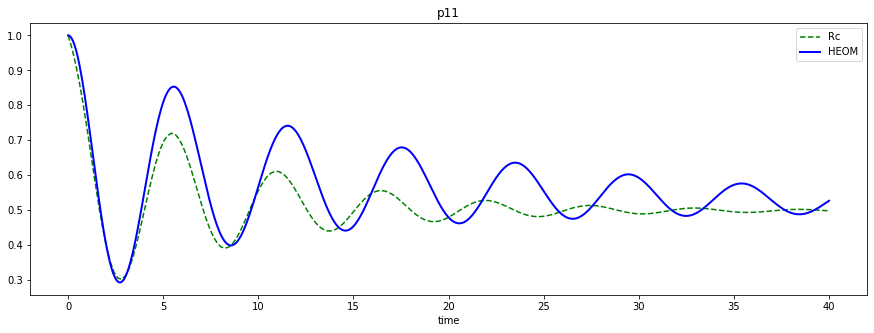

In [111]:
plt.title("p11")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t,p01,"--",label='Rc', color = "g")
plt.plot(tlist, np.real(P11exp), 'b', linewidth=2, label="HEOM")
#plt.plot(tlist, result.expect[0])
plt.xlabel("time")
plt.legend()
plt.show()

Number of trajectories = 250
Number of steps = 628


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[2.5 ]
 [1.  ]
 [0.25]
 [0.  ]]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.-2.5j ]
 [0.-1.j  ]
 [0.-0.25j]
 [0.+0.j  ]]

In [56]:
M=trajectory1(EV[1][3])

[[0.0, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]], [0.1, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.96754644-0.24432991j]
 [0.02004509-0.05619611j]
 [0.        -0.02443299j]
 [0.        +0.j        ]]], [0.2, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.83299509-4.54378529e-01j]
 [-0.07041967-3.04236843e-01j]
 [-0.00914149-4.52503585e-02j]
 [-0.00302423-2.01281565e-04j]]], [0.30000000000000004, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.62213216-0.59585347j]
 [-0.04696879-0.5014005j ]
 [-0.02488193-0.05910251j]
 [-0.01129053-0.00787389j]]], [0.4, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.42101211-0.7502347j ]
 [-0.24807835-0.4366152j ]
 [-0.04825877-0.07243924j]
 [-0.01106829-0.00470615j]]], [0.5, Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = 

<function matplotlib.pyplot.show(*args, **kw)>

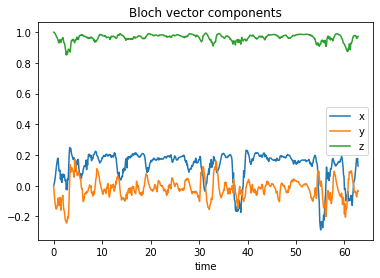